In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/MyDrive/datos")

dato = pd.read_csv("vgsales.csv",on_bad_lines='skip',sep=';')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


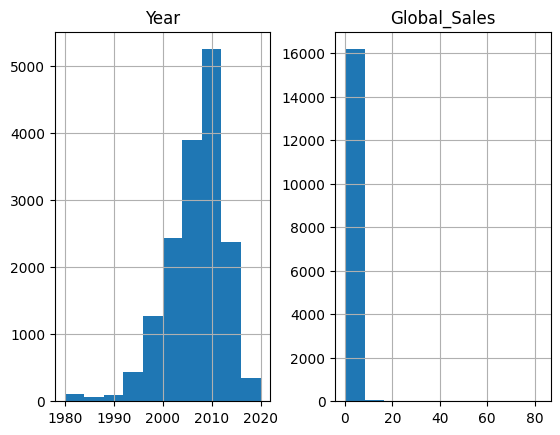

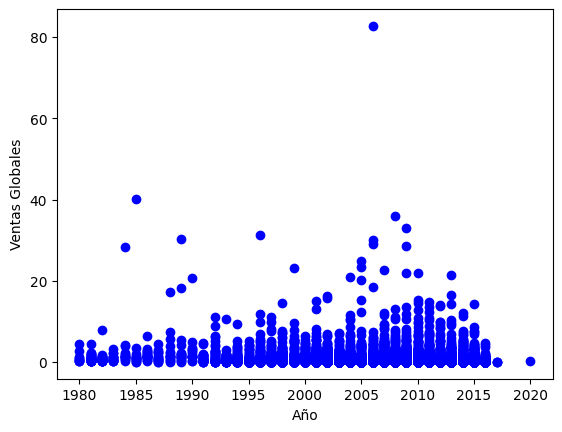

Coeficiente: [[-0.01953679]]
Intersección: [39.74444043]


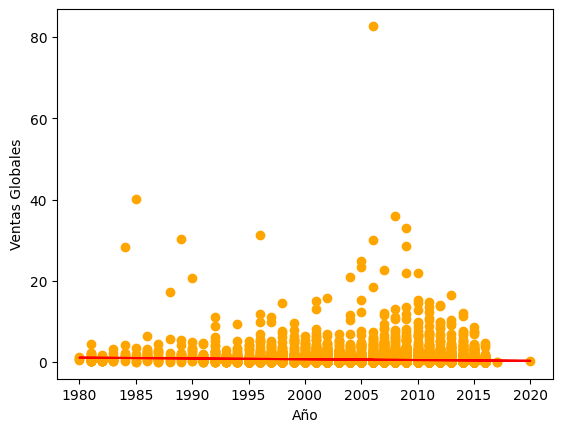

Error cuadrático medio: 0.57
Suma cuadrática: 1.79
R2: 0.01


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

dato = pd.read_csv("vgsales.csv", on_bad_lines='skip', sep=';')

# Eliminar filas con datos faltantes o erróneos
dato = dato.replace("N/A", np.nan)
dato = dato.dropna()

# Convertir las columnas numéricas a tipo float
dato[['Year', 'Global_Sales']] = dato[['Year', 'Global_Sales']].astype(float)

# Seleccionar características
cda = dato[['Year', 'Global_Sales']]
cda.head(50)

# Gráficos de las características antes de la limpieza
viz = cda[['Year', 'Global_Sales']]
viz.hist()
plt.show()

# Gráfico año vs ventas globales antes de la limpieza
plt.scatter(cda.Year, cda.Global_Sales, color='blue')
plt.xlabel("Año")
plt.ylabel("Ventas Globales")
plt.show()

# Máscara para seleccionar el 80% de los datos al azar para el entrenamiento
msk = np.random.rand(len(dato)) < 0.8
entreno = cda[msk]
test = cda[~msk]

# Modelar los datos en una regresión lineal
regr = linear_model.LinearRegression()
entre_x = np.asanyarray(entreno[['Year']])
entre_y = np.asanyarray(entreno[['Global_Sales']])
regr.fit(entre_x, entre_y)

# Pendiente e intersección
print("Coeficiente:", regr.coef_) # Mostramos theta
print("Intersección:", regr.intercept_)

# Mostrar la línea de ajuste lineal
plt.scatter(entreno.Year, entreno.Global_Sales, color='orange')
plt.plot(entre_x, regr.coef_[0][0]*entre_x + regr.intercept_[0], '-r')
plt.xlabel("Año")
plt.ylabel("Ventas Globales")
plt.show()

# Evaluar el modelo utilizando el error cuadrático medio
test_x = np.asanyarray(test[['Year']])
test_y = np.asanyarray(test[['Global_Sales']])
testeo = regr.predict(test_x)

# Imprimir métricas
print("Error cuadrático medio: %.2f" % np.mean(np.absolute(testeo - test_y)))
print("Suma cuadrática: %.2f" % np.mean((testeo - test_y) ** 2))
print("R2: %.2f" % r2_score(test_y, testeo))
